In [18]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [10]:
df = pd.DataFrame()
for _ in range(25):
    df_temp = pd.DataFrame()
    data    = []
    labels  = []
    
    classes_2b_selected = random.randint(2, 4)

    for selected_class in range(classes_2b_selected):
        label         = random.randint(0, 9) 
        index_labels  = np.where(y_train == label)
        sample_size   = random.randint(1, 30) / 100.0
        index_sampled = random.choices(index_labels[0], k=int(sample_size * len(index_labels[0]) ) )

        data   += [item for item in x_train[index_sampled]] 
        labels += [item[0] for item in y_train[index_sampled]]
        
    df_temp['labels'] = labels
    df_temp['user']   = _
    
    df = pd.concat([df, df_temp], ignore_index=True,)
    

,labels,user
0,4,0
1,4,0
2,4,0
3,4,0
4,4,0
...,...,...
66795,8,24
66796,8,24
66797,8,24
66798,8,24


In [12]:
df_plot = df.groupby(['user', 'labels']).size().reset_index().pivot(columns='labels', index='user', values=0)

<AxesSubplot:xlabel='user'>

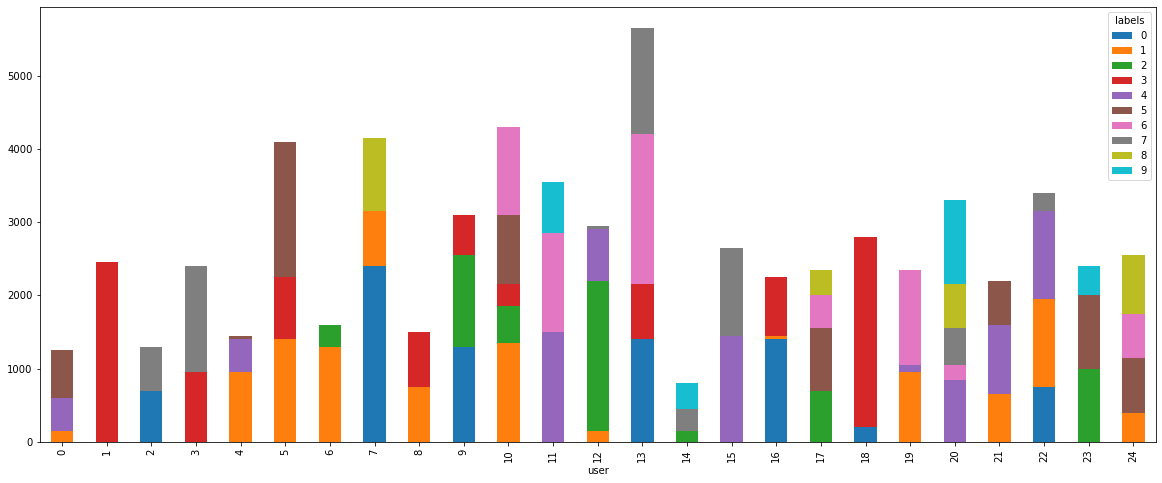

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))

df_plot.plot(kind='bar', stacked=True, ax=ax)

In [61]:
df = pd.DataFrame()
for _ in range(100):
    df_temp = pd.DataFrame()
    data    = []
    labels  = []
    
    sample_size   = 0.1
    index_sampled = random.choices(y_train, k=int(sample_size * len(y_train) ) )

    data   += [item for item in x_train[index_sampled]] 
    labels += [item for item in y_train[index_sampled]]
        
    df_temp['labels'] = labels
    df_temp['user']   = _
    
    df = pd.concat([df, df_temp], ignore_index=True,)
    
df_plot = df.groupby(['user', 'labels']).size().reset_index().pivot(
    columns='labels', index='user', values=0)

<AxesSubplot:xlabel='user'>

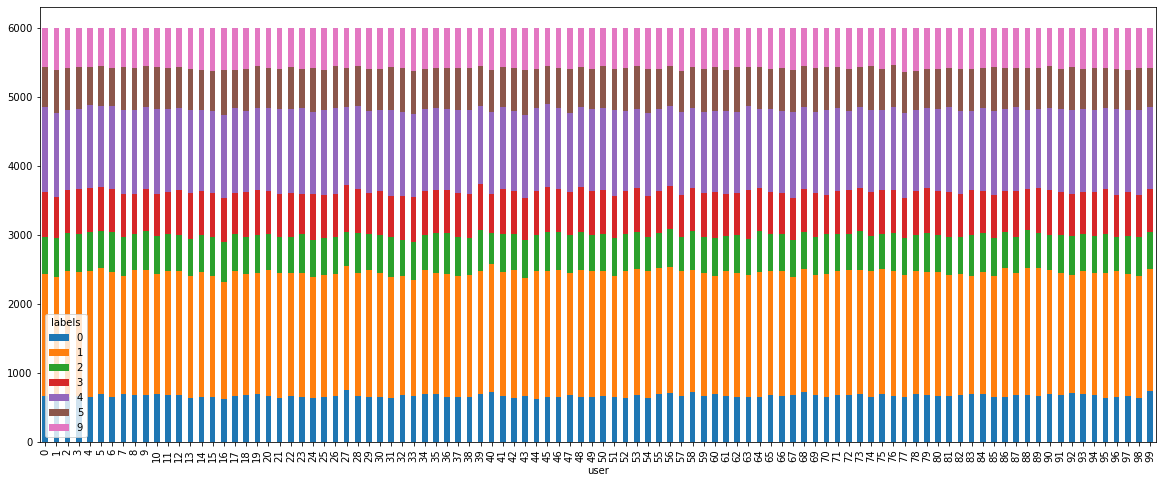

In [62]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))

df_plot.plot(kind='bar', stacked=True, ax=ax)

In [19]:
import pickle
import os

NCLIENTS = [10, 25, 50, 100]

for nclients in NCLIENTS:
    
    for _ in range(nclients):

        index_train   = []
        index_test    = []
     
        classes_2b_selected = random.randint(2, 6)

        for selected_class in range(classes_2b_selected):
            label         = random.randint(0, 9)
            
            index_labels_train  = np.where(y_train == label)
            index_labels_test   = np.where(y_test == label)
            
            sample_size_train   = random.randint(1, 40) / 100.0
            sample_size_test   = random.randint(1, 30) / 100.0
            
            index_sampled_train = random.choices(index_labels_train[0], 
                                                 k=int(sample_size_train * len(index_labels_train[0]) ) )
            index_sampled_test = random.choices(index_labels_test[0], 
                                                 k=int(sample_size_test * len(index_labels_test[0]) ) )

            index_train += [item for item in index_sampled_train]
            index_test  += [item for item in index_sampled_test]
            
            
        filename_train = f"data/CIFAR10/{nclients}/idx_train_{_}.pickle"
        filename_test  = f"data/CIFAR10/{nclients}/idx_test_{_}.pickle"
        
        os.makedirs(os.path.dirname(filename_train), exist_ok=True)
        os.makedirs(os.path.dirname(filename_test), exist_ok=True)
        
        with open(filename_train, 'wb') as handle:
            pickle.dump(index_train, handle, protocol=pickle.HIGHEST_PROTOCOL)
            
        with open(filename_test, 'wb') as handle:
            pickle.dump(index_test, handle, protocol=pickle.HIGHEST_PROTOCOL)
            
